In [3]:
import sympy as sp
import numpy as np
from IPython.display import Math 

sp.init_printing()

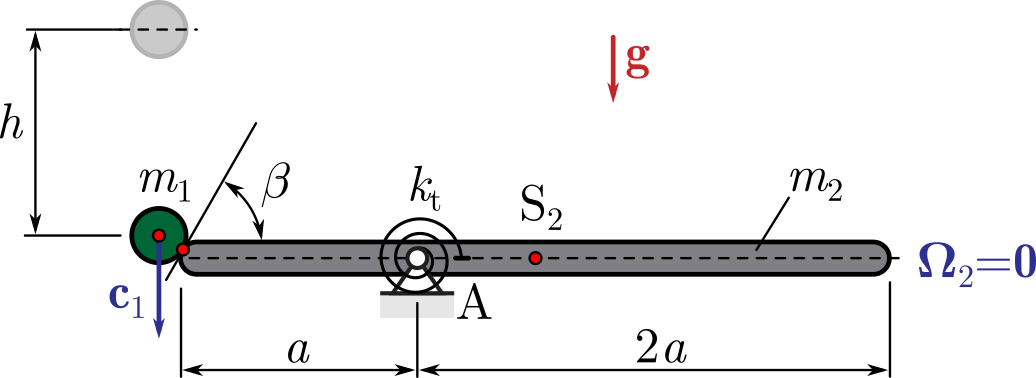

In [12]:
from IPython.display import Image
Image(filename='01.png',width=500)

In [16]:
h, m_1, m_2, e, β, a, g = sp.symbols("h, m_1, m_2, e, β, a, g")

adatok = [(h,0.115), (m_1, 6), (m_2,6), (e,1), (β, sp.pi/3), (a,0.3), (g,9.81)]

A leejtett $m_1$ tömegű test sebességének meghatározása az ütközés pillanata előtt:
$$T_1 - T_0 = W_{01}$$

ahol $T_0$ a kezdeti kinetikus energia, $T_1$ pedig az ütközés pillanata után a kinetikus energia, $W_{01}$ a mechanikai munka, amit a gravitációs erőtér végez. Mivel $m_1$ tömegű testet0 kezdősebességgel ejtettük le: $T_0 = 0$